In [1]:
import os
# os.chdir("..\..")
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/MyDrive/neural-processes-main
import torch
import numpy as np
from data.gp_dataloader import GPDataGenerator
from models.convcnp import ConvCNP, SimpleConv, UNet, train_1d
from utils import plot_np_results
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

# Set the random seed for reproducibility
torch.manual_seed(1)
np.random.seed(1)

Mounted at /content/drive
/content/drive/MyDrive/neural-processes-main
cuda


Using device: cuda


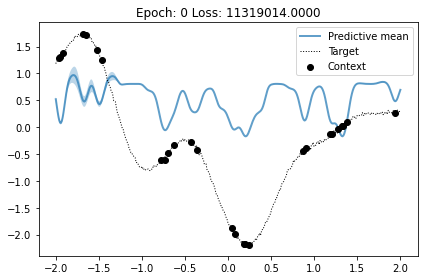

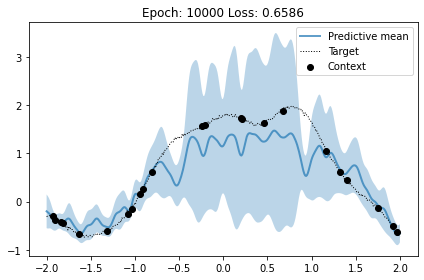

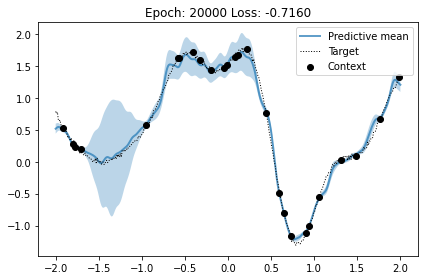

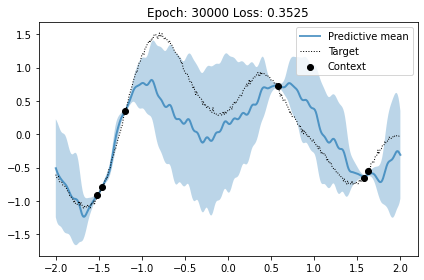

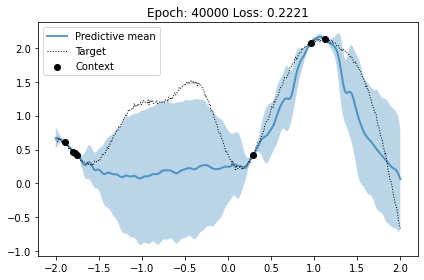

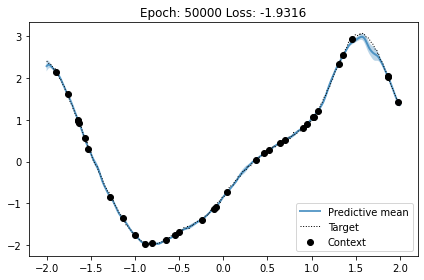

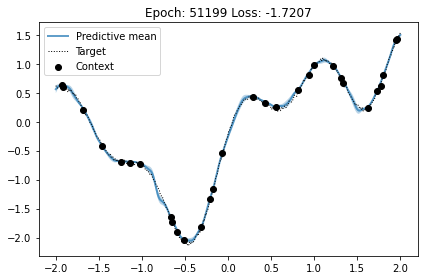

In [2]:
# Test with RBF kernel for ConvCNPXL
train_gen_RBF_XL = GPDataGenerator(randomize_kernel_params=False, max_n_context=50)
test_gen_RBF_XL = GPDataGenerator(randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model_RBF_XL = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=UNet())
train_1d(model_RBF_XL,"1d_RBF_ConvCNPXL", epochs=51200, train_gen=train_gen_RBF_XL, test_gen=test_gen_RBF_XL)

Using device: cuda


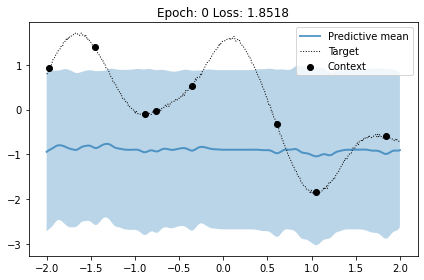

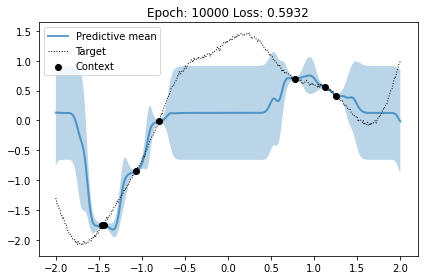

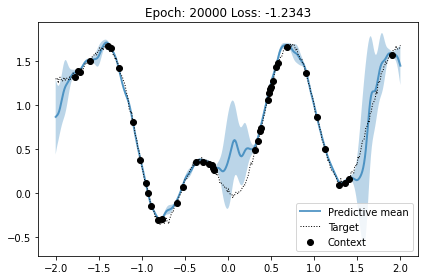

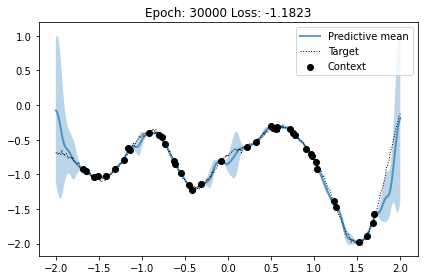

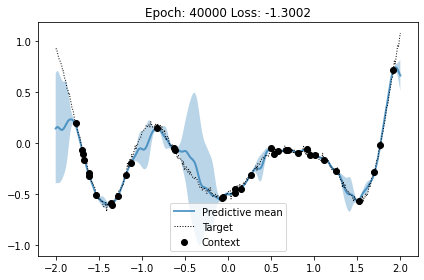

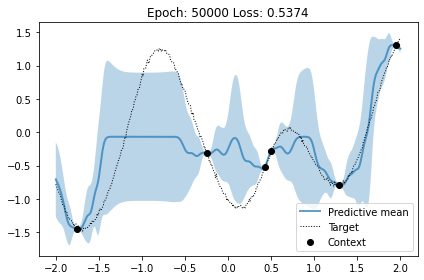

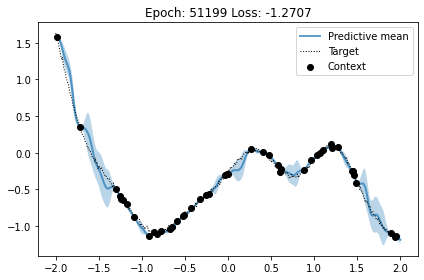

In [3]:
# Test with RBF kernel for ConvCNP
train_gen_RBF = GPDataGenerator(randomize_kernel_params=False, max_n_context=50)
test_gen_RBF = GPDataGenerator(randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model_RBF = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=SimpleConv())
train_1d(model_RBF, "1d_RBF_ConvCNP", epochs=51200, train_gen=train_gen_RBF, test_gen=test_gen_RBF)

Using device: cuda


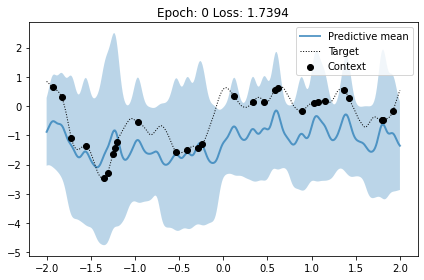

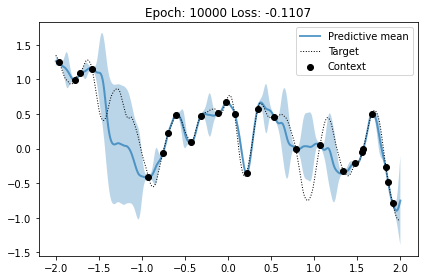

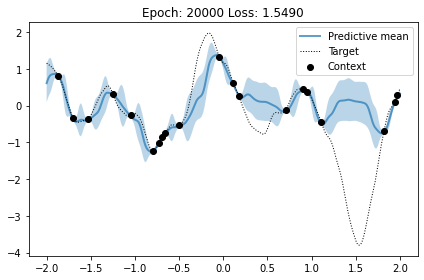

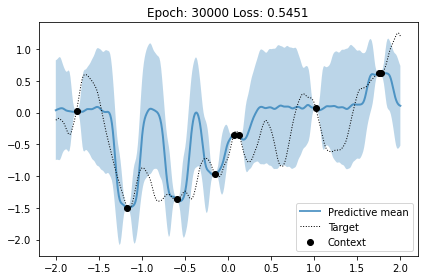

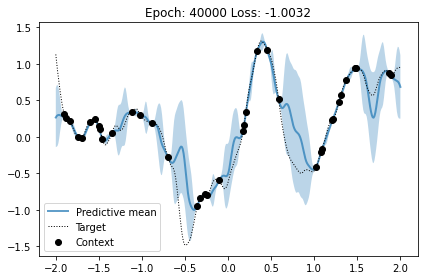

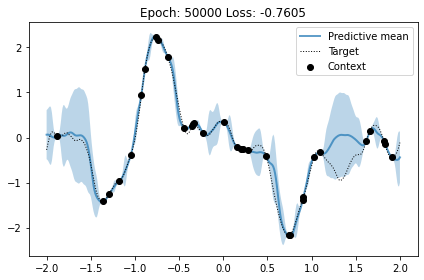

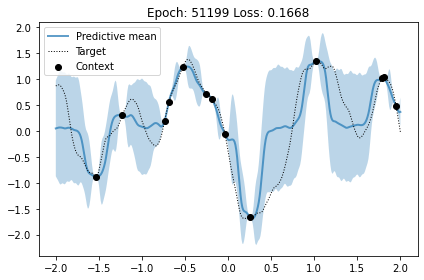

In [4]:
# Test with Matern 5/2 kernel for ConvCNPXL
Matern52 = Matern(length_scale=0.25, nu=2.5)
train_gen_matern52_XL = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, max_n_context=50)
test_gen_matern52_XL = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model_matern52_XL = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=UNet())
train_1d(model_matern52_XL, "1d_Matern52_ConvCNPXL" ,epochs=51200, train_gen=train_gen_matern52_XL, test_gen=test_gen_matern52_XL)


Using device: cuda


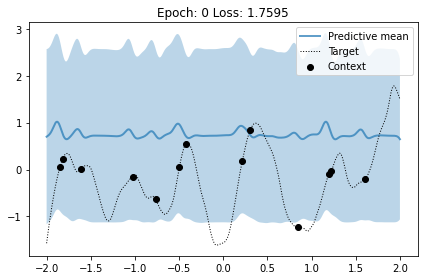

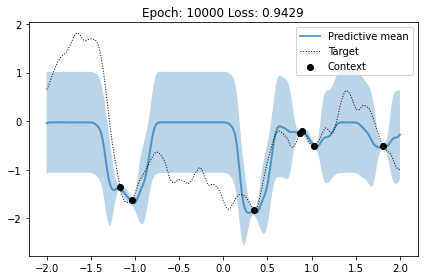

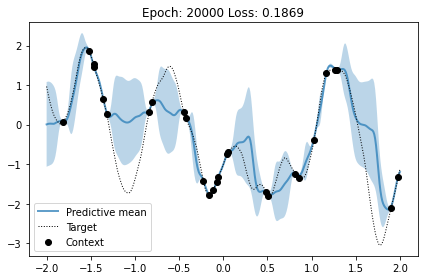

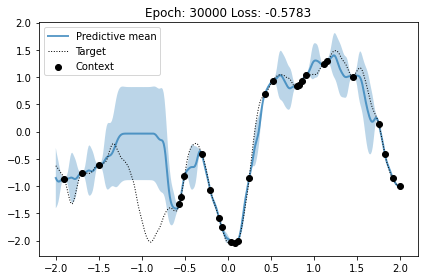

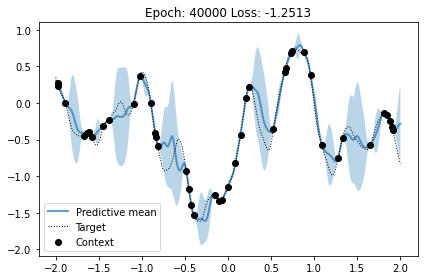

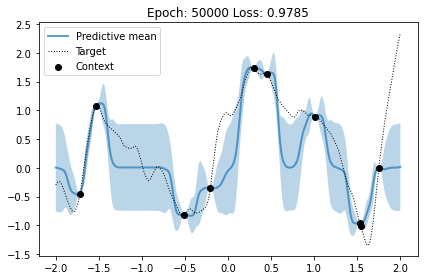

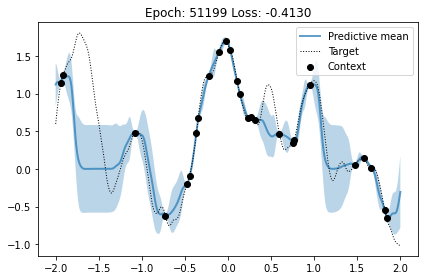

In [5]:
# Test with Matern 5/2 kernel for ConvCNP
Matern52 = Matern(length_scale=0.25, nu=2.5)
train_gen_matern52 = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, max_n_context=50)
test_gen_matern52 = GPDataGenerator(kernel=Matern52,randomize_kernel_params=False, testing=True, max_n_context=50, batch_size=1)

model_matern52 = ConvCNP(in_channels=1, out_channels=1, learn_length_scale=True, points_per_unit=64, rho=SimpleConv())
train_1d(model_matern52,"1d_Matern52_ConvCNP", epochs=51200, train_gen=train_gen_matern52, test_gen=test_gen_matern52)
